## **Project: Study On Panel Data Methodologies With Application To Macroeconometrics (Inflation Forecasting)**.

> ### **Title**: Merge of Dataset.


#### **Table of Contents:**
<ul>
<li><a href="#1">1. .</a></li>
<li><a href="#2">2. .</a></li>
<li><a href="#3">3. .</a></li>
</ul>

<a id=''></a>

#### Final Dataset Table:

- > E. Table for data values `WEO_Data_Countries` name Columns {'WEO_Country_Code', 'Country', 'Advanced_Country', 'Years' , and all Varibles 'WEO_Subject_Code' {'BCA_NGDPD', 'GGR_NGDP', 'GGSB_NPGDP', 'GGX_NGDP', 'GGXWDG_NGDP', 'LUR', 'NGDP_RPCH', 'NGSD_NGDP', 'NID_NGDP', 'PCPIPCH', 'PPPEX', 'PPPPC', 'PPPSH', 'TM_RPCH', 'TRWMA', 'TX_RPCH'} }

In [ ]:
# install 
#!pip install pandas linearmodels statsmodels  pydynpd


**Import Library**

In [117]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import math

import statsmodels.api as sm

from linearmodels.panel import PanelOLS, RandomEffects

from linearmodels.panel import compare
from statsmodels.tsa.stattools import adfuller
from scipy.stats import chi2
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import het_breuschpagan, acorr_breusch_godfrey, het_white

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from statsmodels.regression.mixed_linear_model import MixedLM


sns.set(rc={'figure.figsize': [15,5]}, font_scale=1.2);
pd.set_option('future.no_silent_downcasting', True)


**Load Dataset**

In [99]:
df = pd.read_csv("../03-Dataset/01-Data_Clean.csv")
print(df.shape)
display(df.head())

(1750, 20)


,WEO_Country_Code,Country,Advanced_Country,Year,BCA_NGDPD,GGR_NGDP,GGSB_NPGDP,GGXWDG_NGDP,GGX_NGDP,LUR,NGDP_RPCH,NGSD_NGDP,NID_NGDP,PCPIPCH,PPPEX,PPPPC,PPPSH,TM_RPCH,TRWMA,TX_RPCH
0,213,Argentina,0,2000,-2.878,21.830,-4.552,40.833,25.247,17.134,-0.789,12.459,15.337,-0.939,0.639,13529.290,0.995,-2.322,10.52,1.898
1,213,Argentina,0,2001,-1.316,21.068,-5.590,48.007,26.432,19.209,-4.409,12.325,13.640,-1.065,0.618,13091.488,0.929,-16.587,9.25,6.096
2,213,Argentina,0,2002,7.666,19.943,1.188,147.203,21.853,22.450,-10.894,17.631,9.965,25.869,0.794,11733.021,0.806,-53.558,12.01,0.244
3,213,Argentina,0,2003,5.597,23.526,3.453,125.162,22.026,17.250,8.955,18.474,12.877,13.443,0.859,12914.244,0.847,48.953,12.87,5.006
4,213,Argentina,0,2004,1.798,26.996,4.719,117.878,23.030,13.625,8.911,19.350,17.551,4.416,0.887,14308.616,0.878,51.050,5.96,-0.150


In [100]:
df.drop(columns=[ "WEO_Country_Code"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           1750 non-null   object 
 1   Advanced_Country  1750 non-null   int64  
 2   Year              1750 non-null   int64  
 3   BCA_NGDPD         1750 non-null   float64
 4   GGR_NGDP          1750 non-null   float64
 5   GGSB_NPGDP        1750 non-null   float64
 6   GGXWDG_NGDP       1750 non-null   float64
 7   GGX_NGDP          1750 non-null   float64
 8   LUR               1750 non-null   float64
 9   NGDP_RPCH         1750 non-null   float64
 10  NGSD_NGDP         1750 non-null   float64
 11  NID_NGDP          1750 non-null   float64
 12  PCPIPCH           1750 non-null   float64
 13  PPPEX             1750 non-null   float64
 14  PPPPC             1750 non-null   float64
 15  PPPSH             1750 non-null   float64
 16  TM_RPCH           1750 non-null   float64


In [101]:
#df = df[[col for col in df.columns if col != "PCPIPCH"]+["PCPIPCH"] ]

cols = list(df.columns)
cols.remove('PCPIPCH')
cols.insert(2, 'PCPIPCH')
df = df[cols]

df.head()

,Country,Advanced_Country,PCPIPCH,Year,BCA_NGDPD,GGR_NGDP,GGSB_NPGDP,GGXWDG_NGDP,GGX_NGDP,LUR,NGDP_RPCH,NGSD_NGDP,NID_NGDP,PPPEX,PPPPC,PPPSH,TM_RPCH,TRWMA,TX_RPCH
0,Argentina,0,-0.939,2000,-2.878,21.830,-4.552,40.833,25.247,17.134,-0.789,12.459,15.337,0.639,13529.290,0.995,-2.322,10.52,1.898
1,Argentina,0,-1.065,2001,-1.316,21.068,-5.590,48.007,26.432,19.209,-4.409,12.325,13.640,0.618,13091.488,0.929,-16.587,9.25,6.096
2,Argentina,0,25.869,2002,7.666,19.943,1.188,147.203,21.853,22.450,-10.894,17.631,9.965,0.794,11733.021,0.806,-53.558,12.01,0.244
3,Argentina,0,13.443,2003,5.597,23.526,3.453,125.162,22.026,17.250,8.955,18.474,12.877,0.859,12914.244,0.847,48.953,12.87,5.006
4,Argentina,0,4.416,2004,1.798,26.996,4.719,117.878,23.030,13.625,8.911,19.350,17.551,0.887,14308.616,0.878,51.050,5.96,-0.150


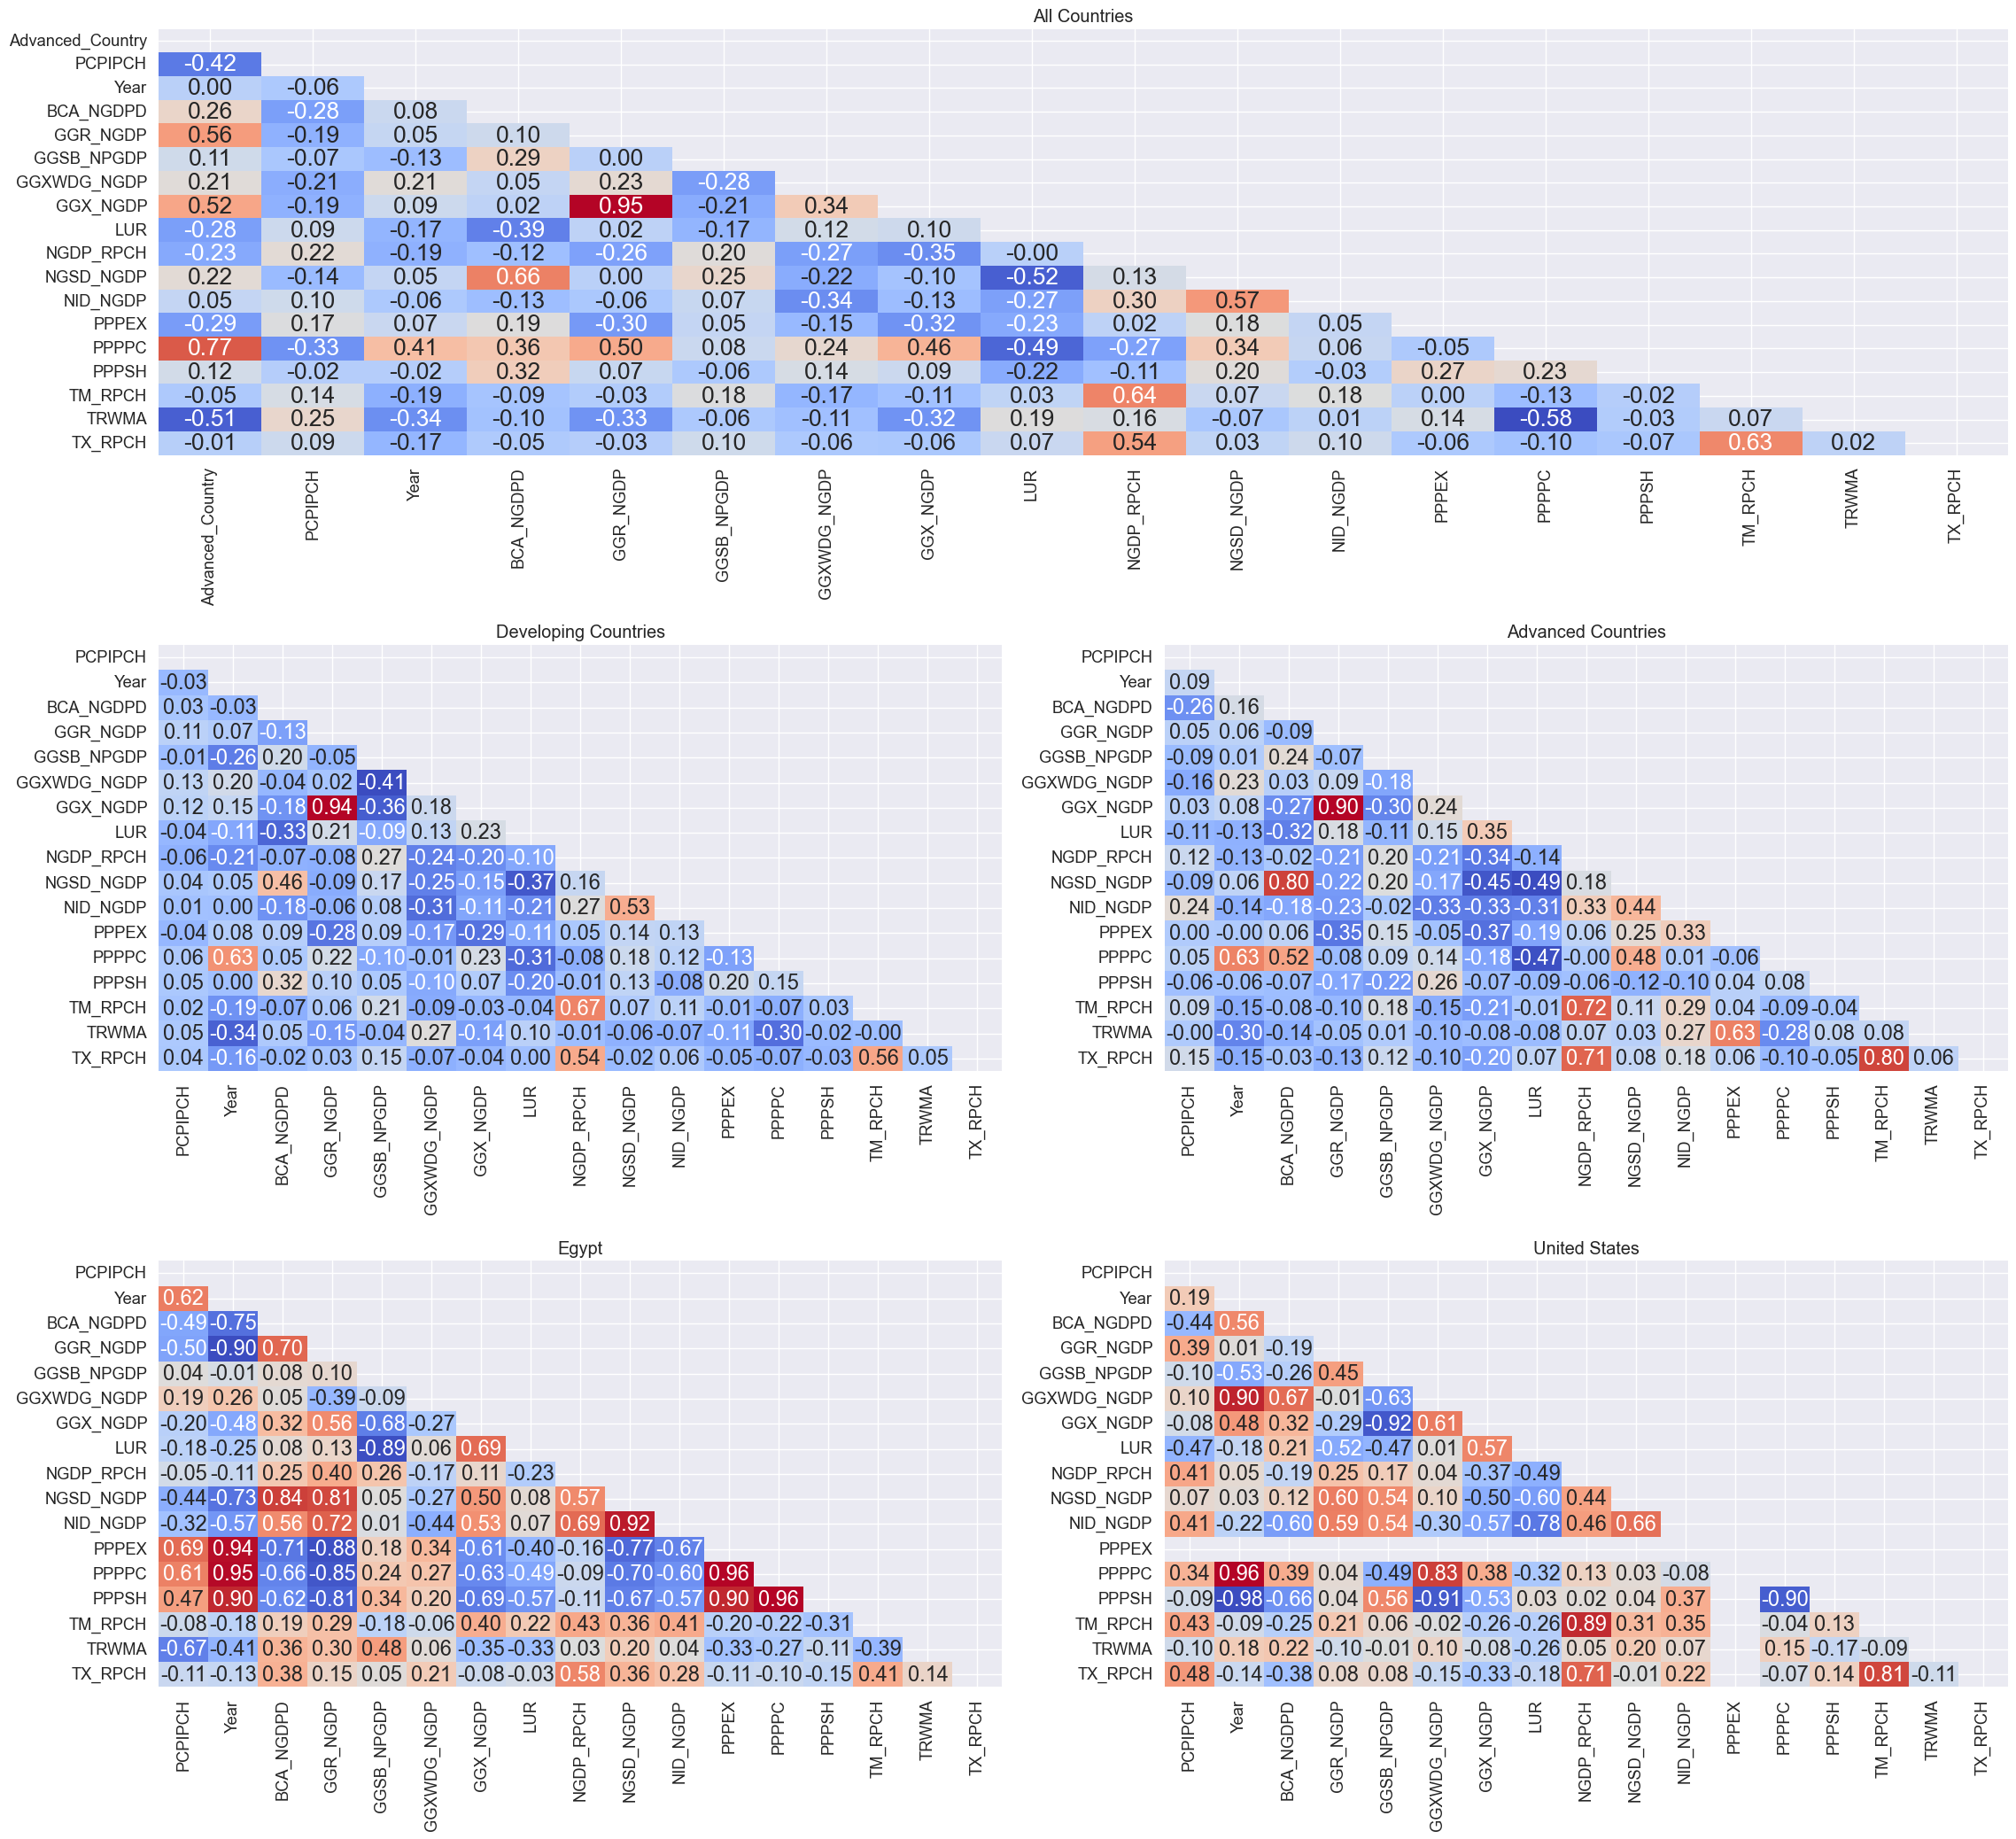

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Compute correlation matrices
corr_all = df.drop(columns=["Country"]).corr("spearman")
corr_dev = df[df["Advanced_Country"] == 0].drop(columns=["Country", "Advanced_Country"]).corr()
corr_adv = df[df["Advanced_Country"] == 1].drop(columns=["Country", "Advanced_Country"]).corr()
corr_egy = df[df["Country"] == "Egypt"].drop(columns=["Country", "Advanced_Country"]).corr()
corr_usa = df[df["Country"] == "United States"].drop(columns=["Country", "Advanced_Country"]).corr()

# List of matrices with titles
matrices = [
    ("All Countries", corr_all),
    ("Developing Countries", corr_dev),
    ("Advanced Countries", corr_adv),
    ("Egypt", corr_egy),
    ("United States", corr_usa)
]

# Create figure and gridspec: 3 rows, 2 columns
fig = plt.figure(figsize=(23, 21))
gs = GridSpec(3, 2, figure=fig)

# First heatmap takes full width (row 0, all columns)
ax1 = fig.add_subplot(gs[0, :])
mask = np.triu(np.ones_like(matrices[0][1], dtype=bool))
sns.heatmap(matrices[0][1], mask=mask, annot=True, fmt=".2f", cmap="coolwarm", cbar=False, annot_kws={"size": 19}, ax=ax1)
ax1.set_title(matrices[0][0])

# Plot remaining 4 heatmaps in a 2x2 grid (rows 1 and 2, cols 0 and 1)
for i, (title, matrix) in enumerate(matrices[1:], start=1):
    row = 1 + (i - 1) // 2  # row 1 or 2
    col = (i - 1) % 2       # col 0 or 1
    ax = fig.add_subplot(gs[row, col])
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    sns.heatmap(matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", cbar=False, annot_kws={"size": 17}, ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()


<a id='1'></a>

### **1. :**

In [102]:
panel_df = df.set_index(['Country', 'Year'])

# Include lagged inflation as independent variable (lag 1)
panel_df['PCPIPCH_lag'] = panel_df.groupby(level=0)['PCPIPCH'].shift(1)
panel_df['PCPIPCH_lag'] = panel_df['PCPIPCH_lag'].fillna(
    panel_df.groupby(level=0)['PCPIPCH'].transform('first')
)
panel_df.head()

Advanced_Country  PCPIPCH  BCA_NGDPD  GGR_NGDP  GGSB_NPGDP  \
Country   Year                                                               
Argentina 2000                 0   -0.939     -2.878    21.830      -4.552   
          2001                 0   -1.065     -1.316    21.068      -5.590   
          2002                 0   25.869      7.666    19.943       1.188   
          2003                 0   13.443      5.597    23.526       3.453   
          2004                 0    4.416      1.798    26.996       4.719   

                GGXWDG_NGDP  GGX_NGDP     LUR  NGDP_RPCH  NGSD_NGDP  NID_NGDP  \
Country   Year                                                                  
Argentina 2000       40.833    25.247  17.134     -0.789     12.459    15.337   
          2001       48.007    26.432  19.209     -4.409     12.325    13.640   
          2002      147.203    21.853  22.450    -10.894     17.631     9.965   
          2003      125.162    22.026  17.250      8.955     18.474    12.877   
          2004      117.878    23.030  13.625      8.911     19.350    17.551   

                PPPEX      PPPPC  PPPSH  TM_RPCH  TRWMA  TX_RPCH  PCPIPCH_lag  
Country   Year                                                                 
Argentina 2000  0.639  13529.290  0.995   -2.322  10.52    1.898       -0.939  
          2001  0.618  13091.488  0.929  -16.587   9.25    6.096       -0.939  
          2002  0.794  11733.021  0.806  -53.558  12.01    0.244       -1.065  
          2003  0.859  12914.244  0.847   48.953  12.87    5.006       25.869  
          2004  0.887  14308.616  0.878   51.050   5.96   -0.150       13.443

In [103]:
# ========== Split data for out-of-sample forecasting ==========
# Define dependent and independent variables
y = panel_df['PCPIPCH']  # Inflation
X_vars = ['BCA_NGDPD', 'GGR_NGDP', 'GGSB_NPGDP', 'GGXWDG_NGDP', 'GGX_NGDP',
              'LUR', 'NGDP_RPCH', 'NGSD_NGDP', 'NID_NGDP', 'PPPEX', 'PPPPC', 'PPPSH',
              'TM_RPCH', 'TRWMA', 'TX_RPCH', "PCPIPCH_lag"]

X = panel_df[X_vars]
X = sm.add_constant(X)


# Helper function for metrics
def evaluate(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2


In [104]:
# Use years up to 2015 for training, after 2015 for testing
train = panel_df.reset_index()
train = train[train['Year'] <= 2015].set_index(['Country', 'Year'])
test = panel_df.reset_index()
test = test[test['Year'] > 2015].set_index(['Country', 'Year'])

y_train = train['PCPIPCH']
X_train = sm.add_constant(train[X_vars])
y_test = test['PCPIPCH']
X_test = sm.add_constant(test[X_vars])



In [76]:
# ===============================
# 1. Pooled OLS model
pooled_ols_model = PooledOLS(y_train, X_train)
pooled_ols_res = pooled_ols_model.fit()
print("Pooled OLS Results:")
print(pooled_ols_res.summary)

# Predict and evaluate RMSE
pooled_preds = pooled_ols_res.predict(X_test)
pooled_rmse,pooled_r2 = evaluate(y_test, pooled_preds)
print(f"Pooled OLS RMSE (out-of-sample): {pooled_rmse:.4f} \nPooled OLS R_sq (out-of-sample): {pooled_r2:.4f}" )

Pooled OLS Results:
                          PooledOLS Estimation Summary                          
Dep. Variable:                PCPIPCH   R-squared:                        0.7049
Estimator:                  PooledOLS   R-squared (Between):              0.9550
No. Observations:                1120   R-squared (Within):               0.5830
Date:                Tue, May 27 2025   R-squared (Overall):              0.7049
Time:                        15:33:54   Log-likelihood                   -3361.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      164.70
Entities:                          70   P-value                           0.0000
Avg Obs:                       16.000   Distribution:                 F(16,1103)
Min Obs:                       16.000                                           
Max Obs:                       16.000   F-statistic (robust):             164.70
        

In [77]:
# ===============================
# 2. Fixed Effects model
fe_model = PanelOLS(y_train, X_train, entity_effects=True)
fe_res = fe_model.fit()
print("Fixed Effects Results:")
print(fe_res.summary)

# Predict (note: fixed effects prediction only valid for known entities in test set)
fe_preds = fe_res.predict(X_test)
fe_rmse, fe_r2 = evaluate(y_test, fe_preds)
print(f"Fixed Effects RMSE (out-of-sample): {fe_rmse:.4f}\nFixed Effects R_sq (out-of-sample):{fe_r2:.4f}")

Fixed Effects Results:
                          PanelOLS Estimation Summary                           
Dep. Variable:                PCPIPCH   R-squared:                        0.5949
Estimator:                   PanelOLS   R-squared (Between):              0.6904
No. Observations:                1120   R-squared (Within):               0.5949
Date:                Tue, May 27 2025   R-squared (Overall):              0.6262
Time:                        15:34:01   Log-likelihood                   -3316.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      94.900
Entities:                          70   P-value                           0.0000
Avg Obs:                       16.000   Distribution:                 F(16,1034)
Min Obs:                       16.000                                           
Max Obs:                       16.000   F-statistic (robust):             94.900
     

In [78]:
# ===============================
# 3. Random Effects model
re_model = RandomEffects(y_train, X_train)
re_res = re_model.fit()
print("Random Effects Results:")
print(re_res.summary)

# Predict and RMSE
re_preds = re_res.predict(X_test)
re_rmse, re_r2 = evaluate(y_test, re_preds)
print(f"Random Effects RMSE (out-of-sample): {re_rmse:.4f}\nRandom Effects R_sq (out-of-sample): {re_r2:.4f}")


Random Effects Results:
                        RandomEffects Estimation Summary                        
Dep. Variable:                PCPIPCH   R-squared:                        0.7049
Estimator:              RandomEffects   R-squared (Between):              0.9550
No. Observations:                1120   R-squared (Within):               0.5830
Date:                Tue, May 27 2025   R-squared (Overall):              0.7049
Time:                        15:34:02   Log-likelihood                   -3361.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      164.70
Entities:                          70   P-value                           0.0000
Avg Obs:                       16.000   Distribution:                 F(16,1103)
Min Obs:                       16.000                                           
Max Obs:                       16.000   F-statistic (robust):             164.70
    

<a id='2'></a>

### **2. :**

In [79]:
# ===============================
# 4. Hausman test: fixed vs random effects
def hausman(fe, re):
    b_diff = fe.params - re.params
    cov_diff = fe.cov - re.cov
    stat = np.dot(np.dot(b_diff.T, np.linalg.inv(cov_diff)), b_diff)
    df_n = b_diff.shape[0]
    pval = 1 - chi2.cdf(stat, df_n)
    return stat, pval

haus_stat, haus_pval = hausman(fe_res, re_res)
print(f"Hausman test statistic: {haus_stat:.4f}, p-value: {haus_pval:.4f}")
if haus_pval < 0.05:
    print("Hausman test suggests Fixed Effects preferred.")
else:
    print("Hausman test suggests Random Effects preferred.")

Hausman test statistic: 66.7838, p-value: 0.0000
Hausman test suggests Fixed Effects preferred.


In [88]:
# ===============================
# 5. Wald test on Fixed Effects (joint significance of entity effects)

comparison = compare({ 'Pooled OLS': pooled_ols_res, 'Fixed Effects': fe_res})
print("Wald Test (F-test) for joint significance of entity effects:")
print(comparison)


Wald Test (F-test) for joint significance of entity effects:
                   Model Comparison                  
                            Pooled OLS  Fixed Effects
-----------------------------------------------------
Dep. Variable                  PCPIPCH        PCPIPCH
Estimator                    PooledOLS       PanelOLS
No. Observations                  1120           1120
Cov. Est.                   Unadjusted     Unadjusted
R-squared                       0.7049         0.5949
R-Squared (Within)              0.5830         0.5949
R-Squared (Between)             0.9550         0.6904
R-Squared (Overall)             0.7049         0.6262
F-statistic                     164.70         94.900
P-value (F-stat)                0.0000         0.0000
=====================     ============   ============
const                           2.3023        -0.4014
                              (2.0375)      (-0.1180)
BCA_NGDPD                      -0.0535        -0.1157
                     

In [ ]:
# ===============================
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_np = X.values

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_np, i) for i in range(X_np.shape[1])]

print(vif_data)

In [81]:
# ===============================
# 6. Serial Correlation test (Breusch-Godfrey) on pooled OLS residuals
pooled_residuals = pooled_ols_res.resids
bg_test = acorr_breusch_godfrey(sm.OLS(y_train, X_train).fit(), nlags=2)
print(f"Breusch-Godfrey test for serial correlation: LM stat={bg_test[0]:.4f}, p-value={bg_test[1]:.4f}")


Breusch-Godfrey test for serial correlation: LM stat=58.6460, p-value=0.0000


In [82]:
# ===============================
# 7. Heteroskedasticity tests (Breusch-Pagan and White)
bp_test = het_breuschpagan(pooled_residuals, X_train)
print(f"Breusch-Pagan test: stat={bp_test[0]:.4f}, p-value={bp_test[1]:.4f}")
white_test = het_white(pooled_residuals, X_train)
print(f"White test: stat={white_test[0]:.4f}, p-value={white_test[1]:.4f}")


Breusch-Pagan test: stat=637.1342, p-value=0.0000
White test: stat=886.9659, p-value=0.0000


In [83]:

# ===============================
# 8. Stationarity test (ADF) for inflation - repeated for each country
countries = panel_df.index.get_level_values(0).unique()
print("\nADF Stationarity Test Results:")
for country in countries:
    ts = panel_df.loc[country]['PCPIPCH'].dropna()
    if len(ts) > 10:
        adf_result = adfuller(ts)
        print(f"{country}: ADF Statistic={adf_result[0]:.3f}, p-value={adf_result[1]:.3f}\n")



ADF Stationarity Test Results:
Argentina: ADF Statistic=2.641, p-value=0.999

Australia: ADF Statistic=-1.582, p-value=0.492

Austria: ADF Statistic=-3.054, p-value=0.030

Barbados: ADF Statistic=-1.643, p-value=0.461

Belarus: ADF Statistic=-8.676, p-value=0.000

Belgium: ADF Statistic=-5.046, p-value=0.000

Bosnia and Herzegovina: ADF Statistic=-2.608, p-value=0.091

Brazil: ADF Statistic=-4.845, p-value=0.000

Bulgaria: ADF Statistic=-1.962, p-value=0.303

Canada: ADF Statistic=-0.347, p-value=0.919

Chile: ADF Statistic=-3.294, p-value=0.015

Colombia: ADF Statistic=-1.788, p-value=0.387

Costa Rica: ADF Statistic=-1.457, p-value=0.555

Croatia: ADF Statistic=-2.146, p-value=0.227

Cyprus: ADF Statistic=-3.204, p-value=0.020

Czech Republic: ADF Statistic=-2.888, p-value=0.047

Denmark: ADF Statistic=-3.410, p-value=0.011

Dominican Republic: ADF Statistic=-3.343, p-value=0.013

Ecuador: ADF Statistic=-31.682, p-value=0.000

Egypt: ADF Statistic=-2.252, p-value=0.188

El Salvador:

In [84]:

# ===============================
# 9. Dynamic Panel Model - Arellano-Bond GMM
# Use lagged dependent variable as predictor plus exogenous regressors


In [87]:
# ===============================
# Summary of RMSEs for model comparison
print("\nModel RMSE comparison (lower is better):")
print(f"Pooled OLS RMSE: {pooled_rmse:.4f}, Pooled OLS R_sq: {pooled_r2:.4f}")
print(f"Fixed Effects RMSE: {fe_rmse:.4f}, Fixed Effects R_sq: {fe_r2:.4f}")
print(f"Random Effects RMSE: {re_rmse:.4f}, Random Effects R_sq: {re_r2:.4f}")



Model RMSE comparison (lower is better):
Pooled OLS RMSE: 8.5911, Pooled OLS R_sq: 0.5877
Fixed Effects RMSE: 9.0393, Fixed Effects R_sq: 0.5436
Random Effects RMSE: 8.5911, Random Effects R_sq: 0.5877


In [ ]:
# Summary Table
print("\n========== Model Performance Summary ==========")
print(f"{'Model':<30} {'RMSE':>10} {'R²':>10}")
print(f"{'Pooled OLS':<30} {pooled_rmse:>10.4f} {pooled_r2:>10.4f}")
print(f"{'Fixed Effects':<30} {fe_rmse:>10.4f} {fe_r2:>10.4f}")
print(f"{'Random Effects':<30} {re_rmse:>10.4f} {re_r2:>10.4f}")



========== Model Performance Summary ==========
Model                                RMSE         R²
Pooled OLS                         8.5911     0.5877
Fixed Effects                      9.0393     0.5436
Random Effects                     8.5911     0.5877


<a id='3'></a>

### **3. Apply the interpolation to Missing Values:**

# **END**